# <i>Dscam</i> Manuscript (Figure S1)
This notebook details to code for visualizations produced for Supplementary Figure 1 of the <i>Dscam</i> RNAi manuscript.

## Environment setup

In [1]:
# Install required packages
require(ggplot2)
#require(grid)
require(reshape2)
require(RColorBrewer)
require(gplots)
require(Vennerable)
source("packages/heatmap.3.R")

# Set figure dimensions for notebook
options(repr.plot.width = 6, repr.plot.height = 3)

Loading required package: ggplot2
Loading required package: reshape2
Loading required package: RColorBrewer
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: Vennerable
Loading required package: graph
Loading required package: RBGL
Loading required package: grid
Loading required package: lattice
Loading required package: reshape

Attaching package: ‘reshape’

The following objects are masked from ‘package:reshape2’:

    colsplit, melt, recast

Loading required package: gtools
Loading required package: xtable


## Custom functions

In [2]:
# A ggplot theme good for small manuscript sized images
theme_bw_small <- function (base_size = 10, base_family = "") 
{
  theme_grey(base_size = base_size, base_family = base_family) %+replace% 
    theme(axis.text = element_text(size = rel(0.8)),
          axis.text.x = element_text(angle = 90, vjust = 0.5),
          axis.ticks = element_line(colour = "black"), 
          legend.key = element_rect(colour = "grey80"),
          panel.background = element_rect(fill = "white", colour = NA),
          panel.border = element_rect(fill = NA, colour = "grey50"), 
          panel.grid.major = element_line(colour = "grey90", size = 0.2), 
          panel.grid.minor = element_line(colour = "grey98", size = 0.5), 
          strip.background = element_rect(fill = "white", colour = "white", size = 0.2)) 
} # theme_bw_small()

plotting.factor.levels <- function(data){
  data$library <- factor(data$library, levels = levels(factor(data$library))[c(3:8, 1:2)], labels = gsub(" \\(", "\n(", levels(factor(data$library)))[c(3:8, 1:2)])
#   data$exon_cluster <- factor(data$exon_cluster, levels = levels(factor(data$exon_cluster))[c(2:4, 1)], labels = levels(factor(data$exon_cluster))[c(2:4, 1)])
  data$exon <- factor(data$exon, levels = levels(factor(data$exon))[c(3:length(levels(factor(data$exon))), 1:2)])
  data
} # plotting.factor.levels()

make.Venn.plot <- function(exon = 4, z_limit = 1.96, col = c(1,2)){
    sig.z.rep4 <- all.filter.rep4[all.filter.rep4$exon_cluster == exon & (all.filter.rep4$z.score > z_limit | all.filter.rep4$z.score < -z_limit), ]
    sig.z.rep5 <- all.filter.rep5[all.filter.rep5$exon_cluster == exon & (all.filter.rep5$z.score > z_limit | all.filter.rep5$z.score < -z_limit), ]
    sig.z.rep4.RNAi_exon <- paste(sig.z.rep4$RNAi, sig.z.rep4$exon, sep = "_")
    sig.z.rep5.RNAi_exon <- paste(sig.z.rep5$RNAi, sig.z.rep5$exon, sep = "_")
    
    Venn.vars <- compute.Venn(Venn(list(sig.z.rep4.RNAi_exon, sig.z.rep5.RNAi_exon), SetNames = c("Rep4", "Rep5")), doWeights = T, type = "circles")
    gp <- VennThemes(Venn.vars)
    gp$Face$`11`$fill <- "white"
    gp$Face$`10`$fill <- brewer.pal(8, "Paired")[col[1]]
    gp$Face$`10`$col <- brewer.pal(8, "Paired")[col[1]]
    gp$SetText$Set1$col <- "black"
    gp$Set$Set1$col <- brewer.pal(8, "Paired")[col[1]]
    gp$SetText$Set1$fontsize <- 20
    gp$Face$`01`$fill <- brewer.pal(8, "Paired")[col[2]]
    gp$Face$`01`$col <- brewer.pal(8, "Paired")[col[2]]
    gp$SetText$Set2$col <- "black"
    gp$Set$Set2$col <- brewer.pal(8, "Paired")[col[2]]
    gp$SetText$Set1$fontsize <- 10
    gp$SetText$Set2$fontsize <- 10
    gp$FaceText$`01`$fontsize <- 12
    gp$FaceText$`10`$fontsize <- 12
    gp$FaceText$`00`$fontsize <- 12
    gp$FaceText$`11`$fontsize <- 12
    plot(Venn.vars, gp = gp)
} #make.Venn.plot

## Read data from file
Documentation on the generation of this data file is descibed in the "Dscam Manuscript Analysis" notebook.

In [3]:
all <- read.csv("data/Combined RNAi experiment data.csv", row.names = 1)
all <- plotting.factor.levels(all)
all.filter <- subset(all, PSI.median > 0.1 & exon != "17.skip" & ((exon_cluster != 17 & cor >= 0.8) | exon_cluster == 17))
#sig.hits <- read.csv("data/Significant z-scores.csv")

# Figure S1A. PSI correlation matrix

In [4]:
all.filter.rep4 <- subset(all.filter, replicate == "Rep4")
all.filter.rep5 <- subset(all.filter, replicate == "Rep5")
all.filter.rep4.wide <- dcast(all.filter.rep4, RNAi ~ exon, value.var = "z.score")
all.filter.rep5.wide <- dcast(all.filter.rep5, RNAi ~ exon, value.var = "z.score")
move.rownames <- function(df, row = 1){rownames(df) <- df[, row];  df <- df[, -row]}
all.filter.rep4.wide <- move.rownames(all.filter.rep4.wide)
all.filter.rep5.wide <- move.rownames(all.filter.rep5.wide)
z.cor.matrix <- cor(na.omit(all.filter.rep4.wide), na.omit(all.filter.rep5.wide), use = "everything", method = "pearson")

In [18]:
pal <- brewer.pal(n = 8, "Paired")
exon_row.col <- colnames(z.cor.matrix)
exon_row.col <- gsub("^4.*", pal[1], exon_row.col)
exon_row.col <- gsub("^6.*", pal[3], exon_row.col)
exon_row.col <- gsub("^9.*", pal[5], exon_row.col)
exon_row.col <- gsub("^17.*", pal[7], exon_row.col)

exon_col.col <- colnames(z.cor.matrix)
exon_col.col <- gsub("^4.*", pal[2], exon_col.col)
exon_col.col <- gsub("^6.*", pal[4], exon_col.col)
exon_col.col <- gsub("^9.*", pal[6], exon_col.col)
exon_col.col <- gsub("^17.*", pal[8], exon_col.col)

Warning message:
In image.default(z = matrix(z, ncol = 1), col = col, breaks = tmpbreaks, : unsorted 'breaks' will be sorted before useWarning message:
In image.default(z = matrix(z, ncol = 1), col = col, breaks = tmpbreaks, : unsorted 'breaks' will be sorted before use

pdf 
  2

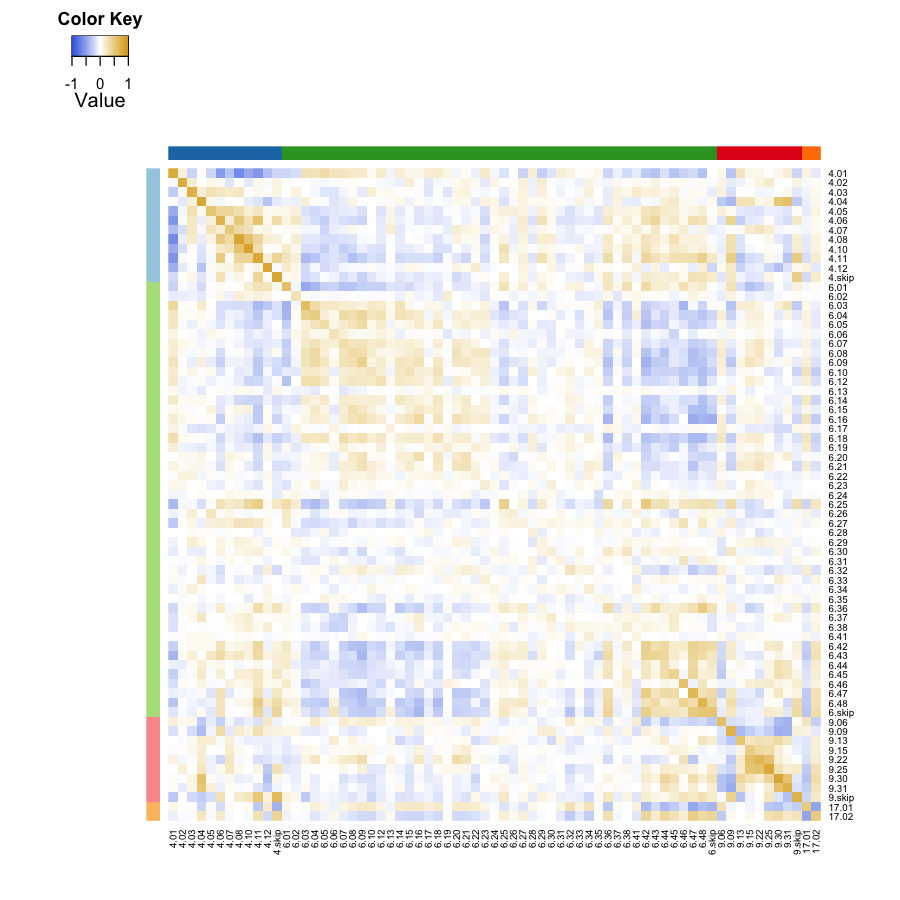

In [6]:
w = 7.5; h = 7.5
options(repr.plot.width = w, repr.plot.height = h)
heatmap.3(z.cor.matrix,
          breaks = seq(-1, 1, by = 0.01),
          margins = c(5, 5),
          Rowv = F, Colv = F,
          dendrogram = "none", 
          col = colorpanel(n = 200, low = "royalblue", mid = "white", high = "goldenrod"),
          trace = "none", tracecol = "black",
          lhei = c(1,5),
          lwid = c(1,5),
          ColSideColors = as.matrix(exon_col.col),
          RowSideColors = as.matrix(t(exon_row.col))
          )

pdf("figures/Figure S1A. Z-score correlation matrix heatmap.pdf", height = h, width = w)
heatmap.3(z.cor.matrix,
          breaks = seq(-1, 1, by = 0.01),
          margins = c(5, 5),
          Rowv = F, Colv = F,
          dendrogram = "none", 
          col = colorpanel(n = 200, low = "royalblue", mid = "white", high = "goldenrod"),
          trace = "none", tracecol = "black",
          lhei = c(1,5),
          lwid = c(1,5),
          ColSideColors = as.matrix(exon_col.col),
          RowSideColors = as.matrix(t(exon_row.col))
          )
dev.off()



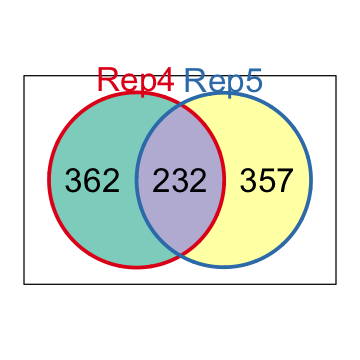

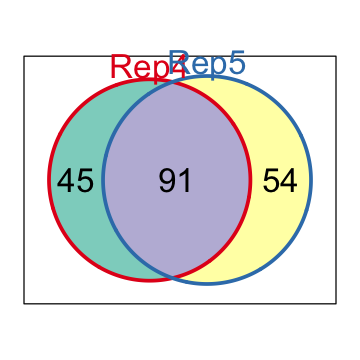

In [81]:
sig.z.rep4 <- subset(all.filter.rep4, z.score > 1.96 | z.score < -1.96)
sig.z.rep5 <- subset(all.filter.rep5, z.score > 1.96 | z.score < -1.96)
sig.z.rep4.RNAi_exon <- paste(sig.z.rep4$RNAi, sig.z.rep4$exon, sep = "_")
sig.z.rep5.RNAi_exon <- paste(sig.z.rep5$RNAi, sig.z.rep5$exon, sep = "_")

w = 3; h = 3
options(repr.plot.width = w, repr.plot.height = h)

plot(Venn(list(sig.z.rep4.RNAi_exon, sig.z.rep5.RNAi_exon), SetNames = c("Rep4", "Rep5")))
plot(Venn(list(sig.z.rep4$RNAi, sig.z.rep5$RNAi), SetNames = c("Rep4", "Rep5")))

pdf 
  2

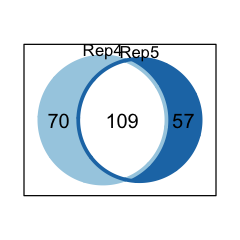

In [79]:
w = 2; h = 2
options(repr.plot.width = w, repr.plot.height = h)

make.Venn.plot(4, col = c(1,2))
pdf("figures/Figure S1B. Exon 4 Venn.pdf", width = w, height = h)
make.Venn.plot(4, col = c(1,2))
dev.off()

pdf 
  2

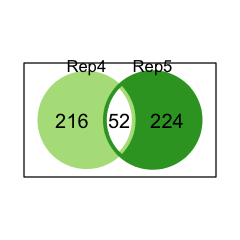

In [15]:
make.Venn.plot(6, col = c(3,4))
pdf("figures/Figure S1B. Exon 6 Venn.pdf", width = w, height = h)
make.Venn.plot(6, col = c(3,4))
dev.off()

pdf 
  2

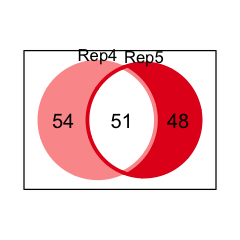

In [16]:
make.Venn.plot(9, col = c(5,6))
pdf("figures/Figure S1B. Exon 9 Venn.pdf", width = w, height = h)
make.Venn.plot(9, col = c(5,6))
dev.off()

pdf 
  2

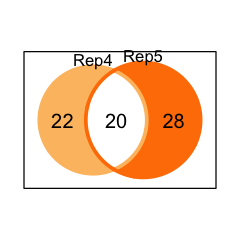

In [17]:
make.Venn.plot(17, col = c(7,8))
pdf("figures/Figure S1B. Exon 17 Venn.pdf", width = w, height = h)
make.Venn.plot(17, col = c(7,8))
dev.off()

,RNAi,exon,exon_cluster,Rep4,Rep5
1,FBgn0000114..aret.,4.01,4,0.05539319,0.659222
2,FBgn0000114..aret.,4.02,4,0.0703923,0.1020317
3,FBgn0000114..aret.,4.03,4,0.8159204,-0.4699757
4,FBgn0000114..aret.,4.04,4,0.1877541,-0.0644119
5,FBgn0000114..aret.,4.05,4,0.3855472,-0.5686152
6,FBgn0000114..aret.,4.06,4,-0.08542856,-0.5369591


Saving 7 x 7 in image


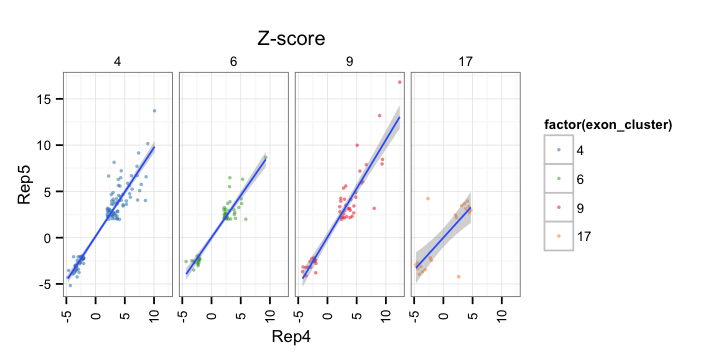

In [83]:
all.filter.z.wide <- dcast(all.filter, RNAi + exon + exon_cluster ~ replicate, value.var = "z.score")

w = 6; h = 3
options(repr.plot.width = w, repr.plot.height = h)

ggplot(subset(all.filter.z.wide, (Rep4 > 1.96 | Rep4 < -1.96) & (Rep5 > 1.96 | Rep5 < -1.96)), aes(x = Rep4, y = Rep5)) +
#ggplot(subset(all.filter.z.wide, (Rep4 > 1.96 & Rep5 > 1.96) | (Rep4 < -1.96 & Rep5 < -1.96)), aes(x = Rep4, y = Rep5)) +
geom_point(size = 1, alpha = 0.5, aes(color = factor(exon_cluster))) + 
stat_smooth(method = "lm") +
scale_color_manual(values = brewer.pal(8, "Paired")[c(2,4,6,8)]) + 
facet_grid(. ~ exon_cluster) + 
theme_bw_small() + 
ggtitle("Z-score")
ggsave("figures/Figure S1C. Significant z-score scatterplot.pdf")

# Figure S1.

<img src="images/Figure%20S1.png"/>